********************

# Modelado dun problema de libre elección 

## Enunciado

Pon en práctica os teus coñecementos de aprendizaxe non supervisado e intenta agora ti buscar relacións entre os datos dun problema que se che ocorra. Nos exercicios anteriores abordouse o caso de 2 variables, polo que animámoste agora a que trates de aplicar clustering sobre un problema con máis dimensións. O único requerimento obrigatorio é **empregar máis de dúas variables para o clustering**. Ten en conta que a nosa implementación de k-means (`k_medias`) está pensada para funcionar sobre conxuntos de datos con dúas variables, pero non é escalable a máis dimensións (certo é que as modificacións necesarias para logralo son mínimas). A vantaxe da función `KMeans` propia de `scikit-learn` é a súa flexibilidade, pois o seu parámetro `x` pode tomar como entrada conxuntos de datos cun maior número de variables. Ten tamén presente que ao aplicar clustering sobre un conxunto de datos de máis de 2 ou 3 variables, a súa visualización complícase e o mellor é visualizar o agrupamento por pares de variables de cara a obter unha boa interpretación.

Igual que na práctica anterior, podes recadar datos e construir un pequeno dataset ti mesmo ou ben obter un de Internet. Fai un breve estudo dos teus datos, incluíndo gráficas e comentarios propios. Obtén un bo agrupamento e da unha interpretación do mesmo. Proporciona todo o código que consideres necesario empregando scripts como os dos exercicios anteriores. Ao entregar esta práctica deberás incluir tamén o arquivo cos datos do teu problema no formato que che resulte máis cómodo (.csv, .txt, etc.).

***************************************************************

## Resposta (6 puntos)

### Selección do dataset e análise dos datos

No meu caso, reutilizarei o dataset da práctica anterior, que contén os puntos por partido, asistencias por partido, rebotes por partido, altura e salario medio anual dos 40 xogadores da NBA mellor pagados nesta tempada 2022/2023.

In [1]:
import pandas as pd  # Importamos a librería (isto sólo é necesario facelo unha vez)

xogadores = pd.read_csv('xogadores.csv',  # Cargamos o csv
                       delimiter=',',
                       header=0)

xogadores.head()

,xogador,mediapuntos,mediarebotes,mediaasistencias,altura,averageannualvalue
0,Stephen Curry,31.4,6.7,7.3,1.88,53838.416
1,LeBron James,25.8,8.6,6.3,2.06,42827.766
2,Russell Westbrook,16.0,5.2,7.2,2.03,41358.814
3,Bradley Beal,26.6,3.8,6.6,1.93,50203.930
4,Kevin Durant,30.4,6.5,7.3,2.08,41063.925


En primeiro lugar, debemos decidir cantas variables empregaremos no estudo. Na anterior práctica, tratei de predicir o salario medio anual a partir das asistencias e dos puntos, pois eran as variables que máis correlación tiñan co salario. Non obstante, agora podería ser interesante incluír as 5 variables e tratar de clasificar aos xogadores empregando todas as variables do conxunto de datos.

Con todo, haberá que comprobar se todas as variables son útiles para clasificar aos xogadores. Pode darse o caso de que a mellor forma de agrupar os datos non empregue todas as variables do dataset.

### Visualización dos datos

Antes de agrupar os datos, tratamos de visualizalos en gráficos de dúas dimensións, nos que temos en conta cada par de variables.

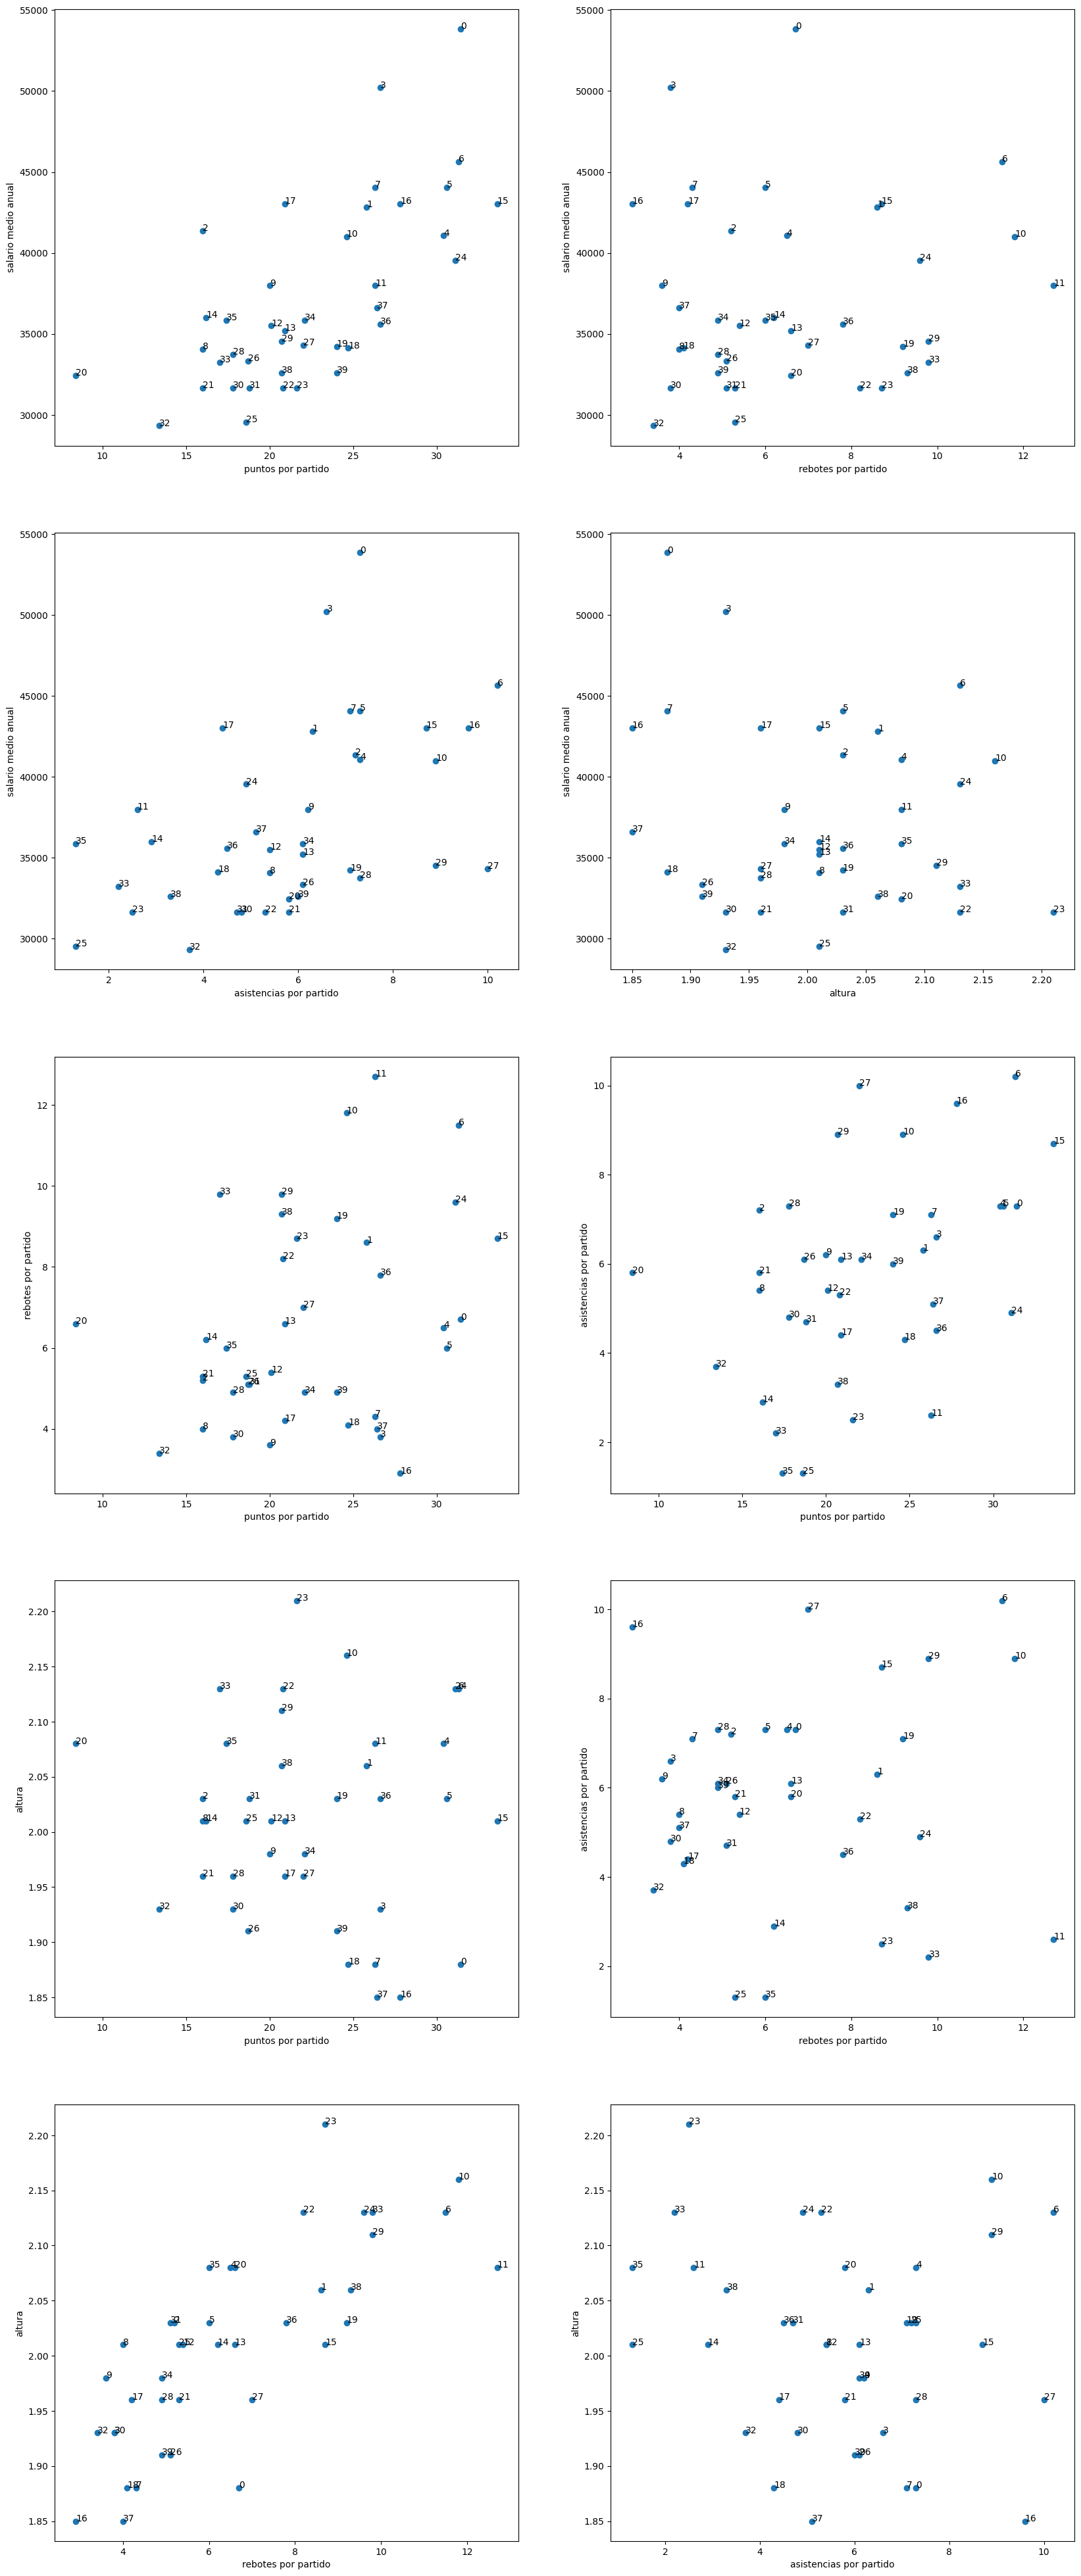

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos o entorno
fig = plt.figure(figsize=(20, 50))
ax1 = fig.add_subplot(521, projection='rectilinear') 
ax2 = fig.add_subplot(522, projection='rectilinear')
ax3 = fig.add_subplot(523, projection='rectilinear') 
ax4 = fig.add_subplot(524, projection='rectilinear')
ax5 = fig.add_subplot(525, projection='rectilinear') 
ax6 = fig.add_subplot(526, projection='rectilinear')
ax7 = fig.add_subplot(527, projection='rectilinear') 
ax8 = fig.add_subplot(528, projection='rectilinear')
ax9 = fig.add_subplot(529, projection='rectilinear')
ax10 = fig.add_subplot(5,2,10, projection='rectilinear')

# Nomeamos os eixos
ax1.set_xlabel("puntos por partido")
ax1.set_ylabel("salario medio anual")

ax2.set_xlabel("rebotes por partido")
ax2.set_ylabel("salario medio anual")

ax3.set_xlabel("asistencias por partido")
ax3.set_ylabel("salario medio anual")

ax4.set_xlabel("altura")
ax4.set_ylabel("salario medio anual")

ax5.set_xlabel("puntos por partido")
ax5.set_ylabel("rebotes por partido")

ax6.set_xlabel("puntos por partido")
ax6.set_ylabel("asistencias por partido")

ax7.set_xlabel("puntos por partido")
ax7.set_ylabel("altura")

ax8.set_xlabel("rebotes por partido")
ax8.set_ylabel("asistencias por partido")

ax9.set_xlabel("rebotes por partido")
ax9.set_ylabel("altura")

ax10.set_xlabel("asistencias por partido")
ax10.set_ylabel("altura")

# Debuxamos o scatter
ax1.scatter(xogadores['mediapuntos'], xogadores['averageannualvalue'])
ax2.scatter(xogadores['mediarebotes'], xogadores['averageannualvalue'])
ax3.scatter(xogadores['mediaasistencias'], xogadores['averageannualvalue'])
ax4.scatter(xogadores['altura'], xogadores['averageannualvalue'])
ax5.scatter(xogadores['mediapuntos'], xogadores['mediarebotes'])
ax6.scatter(xogadores['mediapuntos'], xogadores['mediaasistencias'])
ax7.scatter(xogadores['mediapuntos'], xogadores['altura'])
ax8.scatter(xogadores['mediarebotes'], xogadores['mediaasistencias'])
ax9.scatter(xogadores['mediarebotes'], xogadores['altura'])
ax10.scatter(xogadores['mediaasistencias'], xogadores['altura'])

# Imprimimos os identificadores
for i in xogadores.index:
    ax1.text(xogadores.loc[i,'mediapuntos'], xogadores.loc[i,'averageannualvalue'], i)
    ax2.text(xogadores.loc[i,'mediarebotes'], xogadores.loc[i,'averageannualvalue'], i)
    ax3.text(xogadores.loc[i,'mediaasistencias'], xogadores.loc[i,'averageannualvalue'], i)
    ax4.text(xogadores.loc[i,'altura'], xogadores.loc[i,'averageannualvalue'], i)
    ax5.text(xogadores.loc[i,'mediapuntos'], xogadores.loc[i,'mediarebotes'], i)
    ax6.text(xogadores.loc[i,'mediapuntos'], xogadores.loc[i,'mediaasistencias'], i)
    ax7.text(xogadores.loc[i,'mediapuntos'], xogadores.loc[i,'altura'], i)
    ax8.text(xogadores.loc[i,'mediarebotes'], xogadores.loc[i,'mediaasistencias'], i)
    ax9.text(xogadores.loc[i,'mediarebotes'], xogadores.loc[i,'altura'], i)
    ax10.text(xogadores.loc[i,'mediaasistencias'], xogadores.loc[i,'altura'], i)

plt.show()

Debemos ter en conta que as distancias que se aprecian en cada figura poden ser moi diferentes ás reais, debido a que estas gráficas son proxeccións dos puntos nun plano en dúas dimensións. Os puntos orixinais poderíamos representalos en $R^5$ (cada dimensión representaría unha variable do dataset), co que pode que dous puntos parezan próximos posto que, con respecto a dúas variables toman valores próximos, mais con respecto a outra estean moi lonxe.

Por exemplo, os xogadores número 22 e 24.

In [3]:
xogadores.loc[[22,24], :]

,xogador,mediapuntos,mediarebotes,mediaasistencias,altura,averageannualvalue
22,Karl-Anthony Towns,20.8,8.2,5.3,2.13,31650.60
24,Joel Embiid,31.1,9.6,4.9,2.13,39542.01


Con respecto á altura e ás asistencias poderíamos dicir que están preto, mais con respecto aos puntos por partido e ao salario medio anual están considerablemente lonxe.

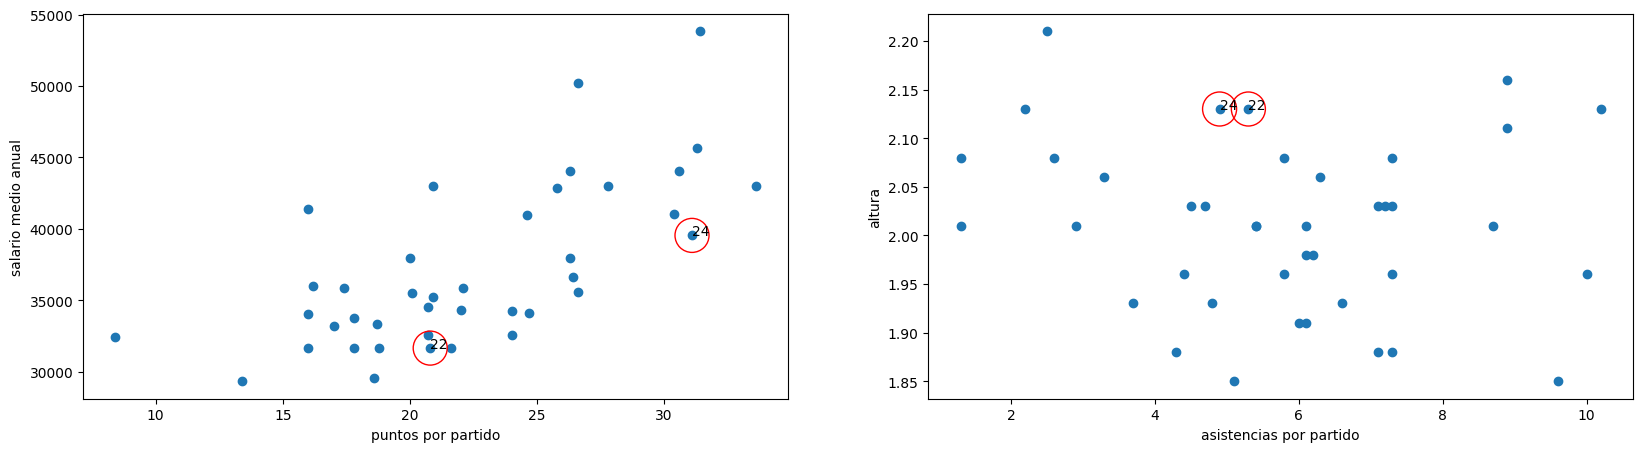

In [4]:
# Creamos o entorno
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121, projection='rectilinear')
ax10 = fig.add_subplot(122, projection='rectilinear')

# Nomeamos os eixos
ax1.set_xlabel("puntos por partido")
ax1.set_ylabel("salario medio anual")

ax10.set_xlabel("asistencias por partido")
ax10.set_ylabel("altura")

# Debuxamos o scatter
ax1.scatter(xogadores['mediapuntos'], xogadores['averageannualvalue'])
ax10.scatter(xogadores['mediaasistencias'], xogadores['altura'])

# Marcamos nas gráficas os xogadores 22 e 24
xog_22 = xogadores.loc[22]
xog_24 = xogadores.loc[24]

ax1.scatter(xog_22['mediapuntos'], xog_22['averageannualvalue'], s=600, facecolors='none', edgecolors='r')
ax1.scatter(xog_24['mediapuntos'], xog_24['averageannualvalue'], s=600, facecolors='none', edgecolors='r')

ax10.scatter(xog_22['mediaasistencias'], xog_22['altura'], s=600, facecolors='none', edgecolors='r')
ax10.scatter(xog_24['mediaasistencias'], xog_24['altura'], s=600, facecolors='none', edgecolors='r')

# Imprimimos os identificadores
for i in [22,24]:
    ax1.text(xogadores.loc[i,'mediapuntos'], xogadores.loc[i,'averageannualvalue'], i)
    ax10.text(xogadores.loc[i,'mediaasistencias'], xogadores.loc[i,'altura'], i)

plt.show()

Polo tanto, se observamos soamente a altura e as asistencias por partidos dos xogadores, cabe esperar que estes dous xogadores pertenzan ao mesmo clúster. Non obstante, ao ter en conta o resto das variables, pode resultar que acaben pertencendo a agrupamentos diferentes.

Con todo existe outro problema que afectará en gran medida aos agrupamentos que comentaremos na seguinte sección.

### Preprocesamento dos datos

Se nos fixamos na escala das variables das anteriores gráficas, por exemplo, a diferencia de altura entre o xogador máis alto e o máis baixo do dataset é de 0.35 unidades, mentres que esta diferenza no salario medio é de 25000 unidades. Isto vai influír enormemente á hora de agrupar os datos, pois ao calcular a distancia entre dous puntos, practicamente só dependerá da distancia con respecto á variable do salario medio anual. Posto que isto non ten sentido, xa que, por exemplo, poderíamos ter expresado o salario medio anual en millóns de euros en lugar de en miles de euros, é conveniente estandarizar os datos.

En caso de que non estandaricemos os datos, a altura non vai influír á hora de realizar os agrupamentos, xa que os xogadores, en relación con esta variable estarán moito máis próximos que, por exemplo, co salario medio anual. Non obstante, se observamos as escalas das demais variables, segue habendo moita diferenza con respecto do salario medio anual (a outra variable que máis varía son os puntos por partido e a diferenza entre o xogador que máis puntos anota e o que menos non chega aos 30).

Pola contra, estandarizar os datos non é algo trivial. Nunha busca rápida, atopei [un artigo](https://www.researchgate.net/profile/Dauda-Usman/publication/288044597_Standardization_and_Its_Effects_on_K-Means_Clustering_Algorithm/links/56b5f9b908aebbde1a79bce7/Standardization-and-Its-Effects-on-K-Means-Clustering-Algorithm.pdf) que analiza o impacto da estandarización no algoritmo de clusterización das K-medias. Nas conclusións, comenta que estandarizar os datos antes de agrupalos conduce cara unha mellora da calidade dos clústers obtidos. Ademais, conclúe que é importante seleccionar un procedemento de estandarización de acordo coa natureza do dataset.

No artigo menciona tres formas de estandarizar os datos:
 - **Z-score**: é un procedemento de estandarización que consiste en calcular a media e desviación típica de cada variable (no meu caso: puntos por partido, rebotes por partido,...) e, para valor de cada variable de cada xogador, restarlle a media e dividilo entre a desviación típica. $$x_{ij} = Z(x_{ij} = \frac{x_{ij} - \bar{x}_{j}}{\sigma_{j}}),$$ onde $\bar{x}_{j}$ denota a media da variable $j$, $\sigma_{j}$, a desviación típica da variable $j$ e $x_{ij}$ o valor da variable $j$ para a fila $i$ do dataset.
 
  Non obstante, este procedemento ten máis sentido aplicalo sobre datasets onde as variables seguen unha distribución normal. No meu caso, non estou seguro de que isto sexa así, máis poderíase estudar.
  
 - **Min-max**: é un procedemento de estandarización que consiste en tranformar o dataset para que cada variable tome valores no intervalo [0.0, 1.0]. Isto conséguese fixando o mínimo de cada variable en 0.0 e o máximo en 1.0. Esta é unha forma doada de comparar valores medidos en escalas ou unidades moi diferentes. $$MM(x_{ij}) = \frac{x_{ij} - x_{\text{min}_j}}{x_{\text{max}_j}-x_{\text{min}_j}}$$
 
 

Polo tanto, para estandarizar os datos empregaremos o segundo procedemento. En realidade, cando graficamos os datos lévase a cabo unha transformación semellante. Polo tanto, ao estandarizar os datos desta forma poderemos apreciar as distancias nas propias gráficas, algo moi útil á hora de interpretar os resultados.

En primeiro lugar representamos o conxunto de datos inicial nun vector bidimensional de *numpy*, é dicir, nunha matriz. Así, as filas corresponderíanse cos xogadores e as columnas con cada un dos datos estatísticos repilados (nome do xogador, puntos por partido, rebotes por partido, asistencias por partido, altura e salario mendio anual).

In [5]:
# Representamos os datos nun array bidimensinal de numpy (e dicir, nunha matriz)
xogadores_mat = xogadores.values
# Esta matriz ten 40 filas e 6 columnas
xogadores_mat.shape

(40, 6)

In [6]:
# Calculamos o mínimo e o máximo de cada variable
minimos = np.amin(xogadores_mat[:,1:], axis=0)
maximos = np.amax(xogadores_mat[:,1:], axis=0)
print(f'Mínimos: {minimos}')
print(f'Máximos: {maximos}')

Mínimos: [8.4 2.9 1.3 1.85 29331.375]
Máximos: [33.6 12.7 10.2 2.21 53838.416]


In [7]:
#Funcion que estandariza o dataset co procedemento Min-max
def standarization_min_max(datos):
    minimos = np.amin(datos, axis=0)
    maximos = np.amax(datos, axis=0)
    
    datos_estandarizados = np.empty(datos.shape)
    
    for j in range(datos.shape[1]):
        datos_estandarizados[:, j] = (datos[:, j] - minimos[j]) / (maximos[j] - minimos[j])
    return datos_estandarizados

In [8]:
xogadores_mat_stand = standarization_min_max(xogadores_mat[:,1:])

Como se ve nas seguintes gráficas, agora os valores das variables toman valores entre 0.0 e 1.0. Para tratar de apreciar as distancias a simple vista nas gráficas é importante que a escala da variable que do eixo X sexa igual que a do eixo Y. Este é o motivo de debuxalas cadradas.

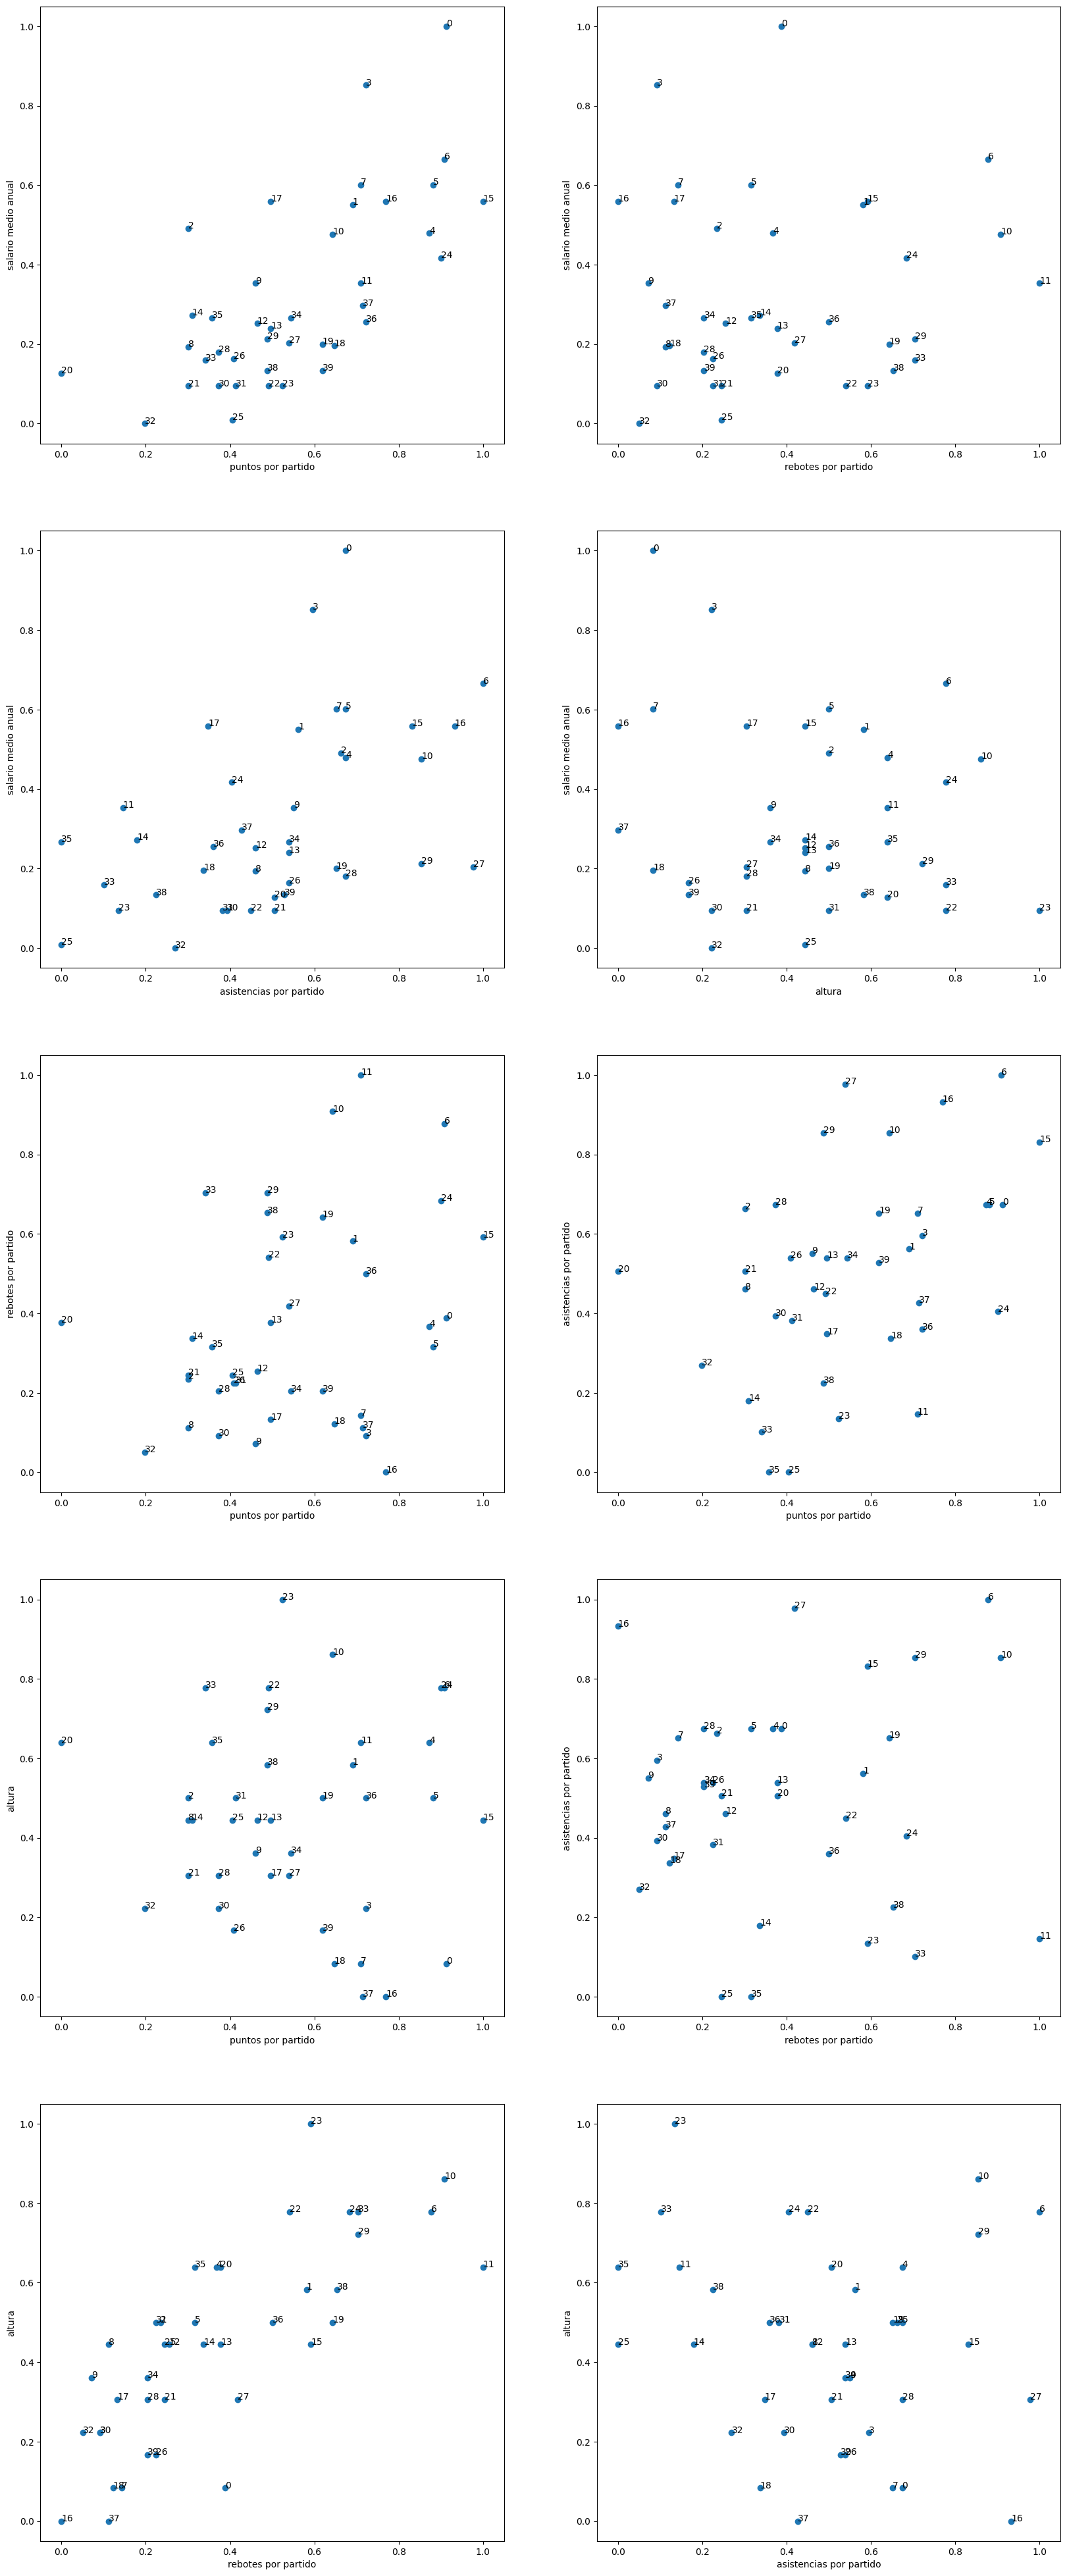

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos o entorno
fig = plt.figure(figsize=(20, 50))
ax1 = fig.add_subplot(521, projection='rectilinear') 
ax2 = fig.add_subplot(522, projection='rectilinear')
ax3 = fig.add_subplot(523, projection='rectilinear') 
ax4 = fig.add_subplot(524, projection='rectilinear')
ax5 = fig.add_subplot(525, projection='rectilinear') 
ax6 = fig.add_subplot(526, projection='rectilinear')
ax7 = fig.add_subplot(527, projection='rectilinear') 
ax8 = fig.add_subplot(528, projection='rectilinear')
ax9 = fig.add_subplot(529, projection='rectilinear')
ax10 = fig.add_subplot(5,2,10, projection='rectilinear')

# Nomeamos os eixos
ax1.set_xlabel("puntos por partido")
ax1.set_ylabel("salario medio anual")

ax2.set_xlabel("rebotes por partido")
ax2.set_ylabel("salario medio anual")

ax3.set_xlabel("asistencias por partido")
ax3.set_ylabel("salario medio anual")

ax4.set_xlabel("altura")
ax4.set_ylabel("salario medio anual")

ax5.set_xlabel("puntos por partido")
ax5.set_ylabel("rebotes por partido")

ax6.set_xlabel("puntos por partido")
ax6.set_ylabel("asistencias por partido")

ax7.set_xlabel("puntos por partido")
ax7.set_ylabel("altura")

ax8.set_xlabel("rebotes por partido")
ax8.set_ylabel("asistencias por partido")

ax9.set_xlabel("rebotes por partido")
ax9.set_ylabel("altura")

ax10.set_xlabel("asistencias por partido")
ax10.set_ylabel("altura")

# Debuxamos o scatter
ax1.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 4])
ax2.scatter(xogadores_mat_stand[:, 1], xogadores_mat_stand[:, 4])
ax3.scatter(xogadores_mat_stand[:, 2], xogadores_mat_stand[:, 4])
ax4.scatter(xogadores_mat_stand[:, 3], xogadores_mat_stand[:, 4])
ax5.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 1])
ax6.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 2])
ax7.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 3])
ax8.scatter(xogadores_mat_stand[:, 1], xogadores_mat_stand[:, 2])
ax9.scatter(xogadores_mat_stand[:, 1], xogadores_mat_stand[:, 3])
ax10.scatter(xogadores_mat_stand[:, 2], xogadores_mat_stand[:, 3])

# Imprimimos os identificadores
for i in xogadores.index:
    ax1.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,4], i)
    ax2.text(xogadores_mat_stand[i,1], xogadores_mat_stand[i,4], i)
    ax3.text(xogadores_mat_stand[i,2], xogadores_mat_stand[i,4], i)
    ax4.text(xogadores_mat_stand[i,3], xogadores_mat_stand[i,4], i)
    ax5.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,1], i)
    ax6.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,2], i)
    ax7.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,3], i)
    ax8.text(xogadores_mat_stand[i,1], xogadores_mat_stand[i,2], i)
    ax9.text(xogadores_mat_stand[i,1], xogadores_mat_stand[i,3], i)
    ax10.text(xogadores_mat_stand[i,2], xogadores_mat_stand[i,3], i)



plt.show()

### Agrupamento dos datos

Unha vez pre-procesados os atos, debemos decidir o número de centroides que imos empregar. Para iso, empregaremos unha función que executará o algoritmo das *k-medias* cun número determinado de centroides e iremos variando este último. Como medida de comparación empregaremos a media cadrática, igual que fixemos nos exercicios anteriores. Ademais, posto que o erro final depende da inicialización dos centroides, executaremos varias veces o algoritmo co mesmo número de centroides, pero inicializándoos de forma distinta.

In [10]:
from sklearn.cluster import KMeans

def k_means(k, m, seed, n_iter=20):
    costes_finais = []
    agrupamentos = []

    for i in range(m):
        # Xeramos aleatoriamente os centroides
        centroides = xogadores_mat[np.random.choice(xogadores_mat.shape[0], size=k, replace=False)]

        # Definimos o modelo
        model = KMeans(n_clusters=len(centroides), init=centroides[:, 1:], n_init=1,
                       max_iter=n_iter, algorithm='lloyd', random_state=seed)
        agr = model.fit(xogadores_mat_stand)
        costes_finais.append(agr.inertia_)
        agrupamentos.append(agr)
    
    # Devolvemos o agrupamento que teña menor custo
    return agrupamentos[np.argmin(costes_finais)]

In [11]:
SEED_VALUE = 123
np.random.seed(SEED_VALUE)

k_max = 10
m = 10
n_iter = 20

custos_finais = []
agrupamentos = []

for k in range(2, k_max+1):
    agrupamento = k_means(k, m, SEED_VALUE, n_iter=n_iter)
    custos_finais.append(agrupamento.inertia_)
    agrupamentos.append(agrupamento)

Unha vez executado o algoritmo varias veces con diferente número de centroides, obtemos o número de centroide "óptimo". Non nos interesa o valor de *k* para o que se ten o menor custo, senón o valor de *k* a partir do cal a redución de custo é moito menor. Noutro caso poderíamos acabar tendo un problema de *overfitting*.

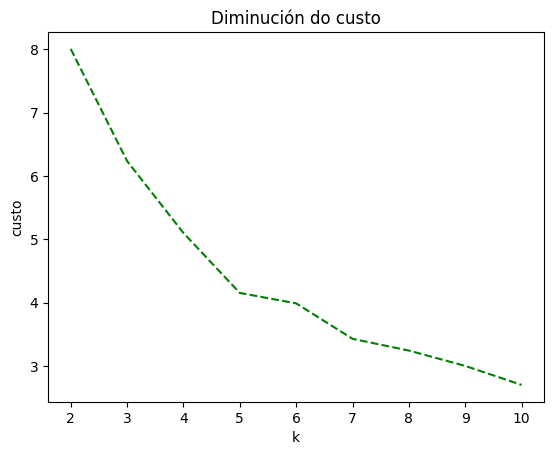

In [12]:
plt.plot(range(2, k_max+1), custos_finais, '--', color="green")
plt.title("Diminución do custo") 
plt.xlabel("k")
plt.ylabel("custo")
plt.show()

A simple vista pódese apreciar que o "cóbado" da función está en $k=5$. A partir deste valor a mellora que obtemos é menos significativa. Por tanto podemos asumir que o número de clusters ideal é 5:

In [13]:
k_mellor = 5
agr_mellor = agrupamentos[k_mellor - 2] # Temos en conta que a lista comeza para k = 2

In [14]:
# Centroides do mellor agrupamento con k = 5
centroides_mellor = agr_mellor.cluster_centers_
centroides_mellor

array([[0.49338624, 0.13435374, 0.41573034, 0.14351852, 0.14723543],
       [0.48324515, 0.5430839 , 0.1772784 , 0.64506173, 0.18196089],
       [0.72222222, 0.15102041, 0.64044944, 0.13888889, 0.71420812],
       [0.77821869, 0.63038549, 0.72284644, 0.64506173, 0.46226185],
       [0.38131313, 0.24768089, 0.56894791, 0.41919192, 0.22679012]])

In [15]:
# Custo do mellor agrupamento con k = 5 (o custo calculase mediante a media cadrática)
agr_mellor.inertia_ / len(xogadores)

0.10385844514959983

In [16]:
clusters_mellor = agr_mellor.labels_
clusters_mellor[:10]

array([2, 3, 4, 2, 3, 3, 3, 2, 4, 4])

A continuación graficamos o agrupamento final por pares de variables

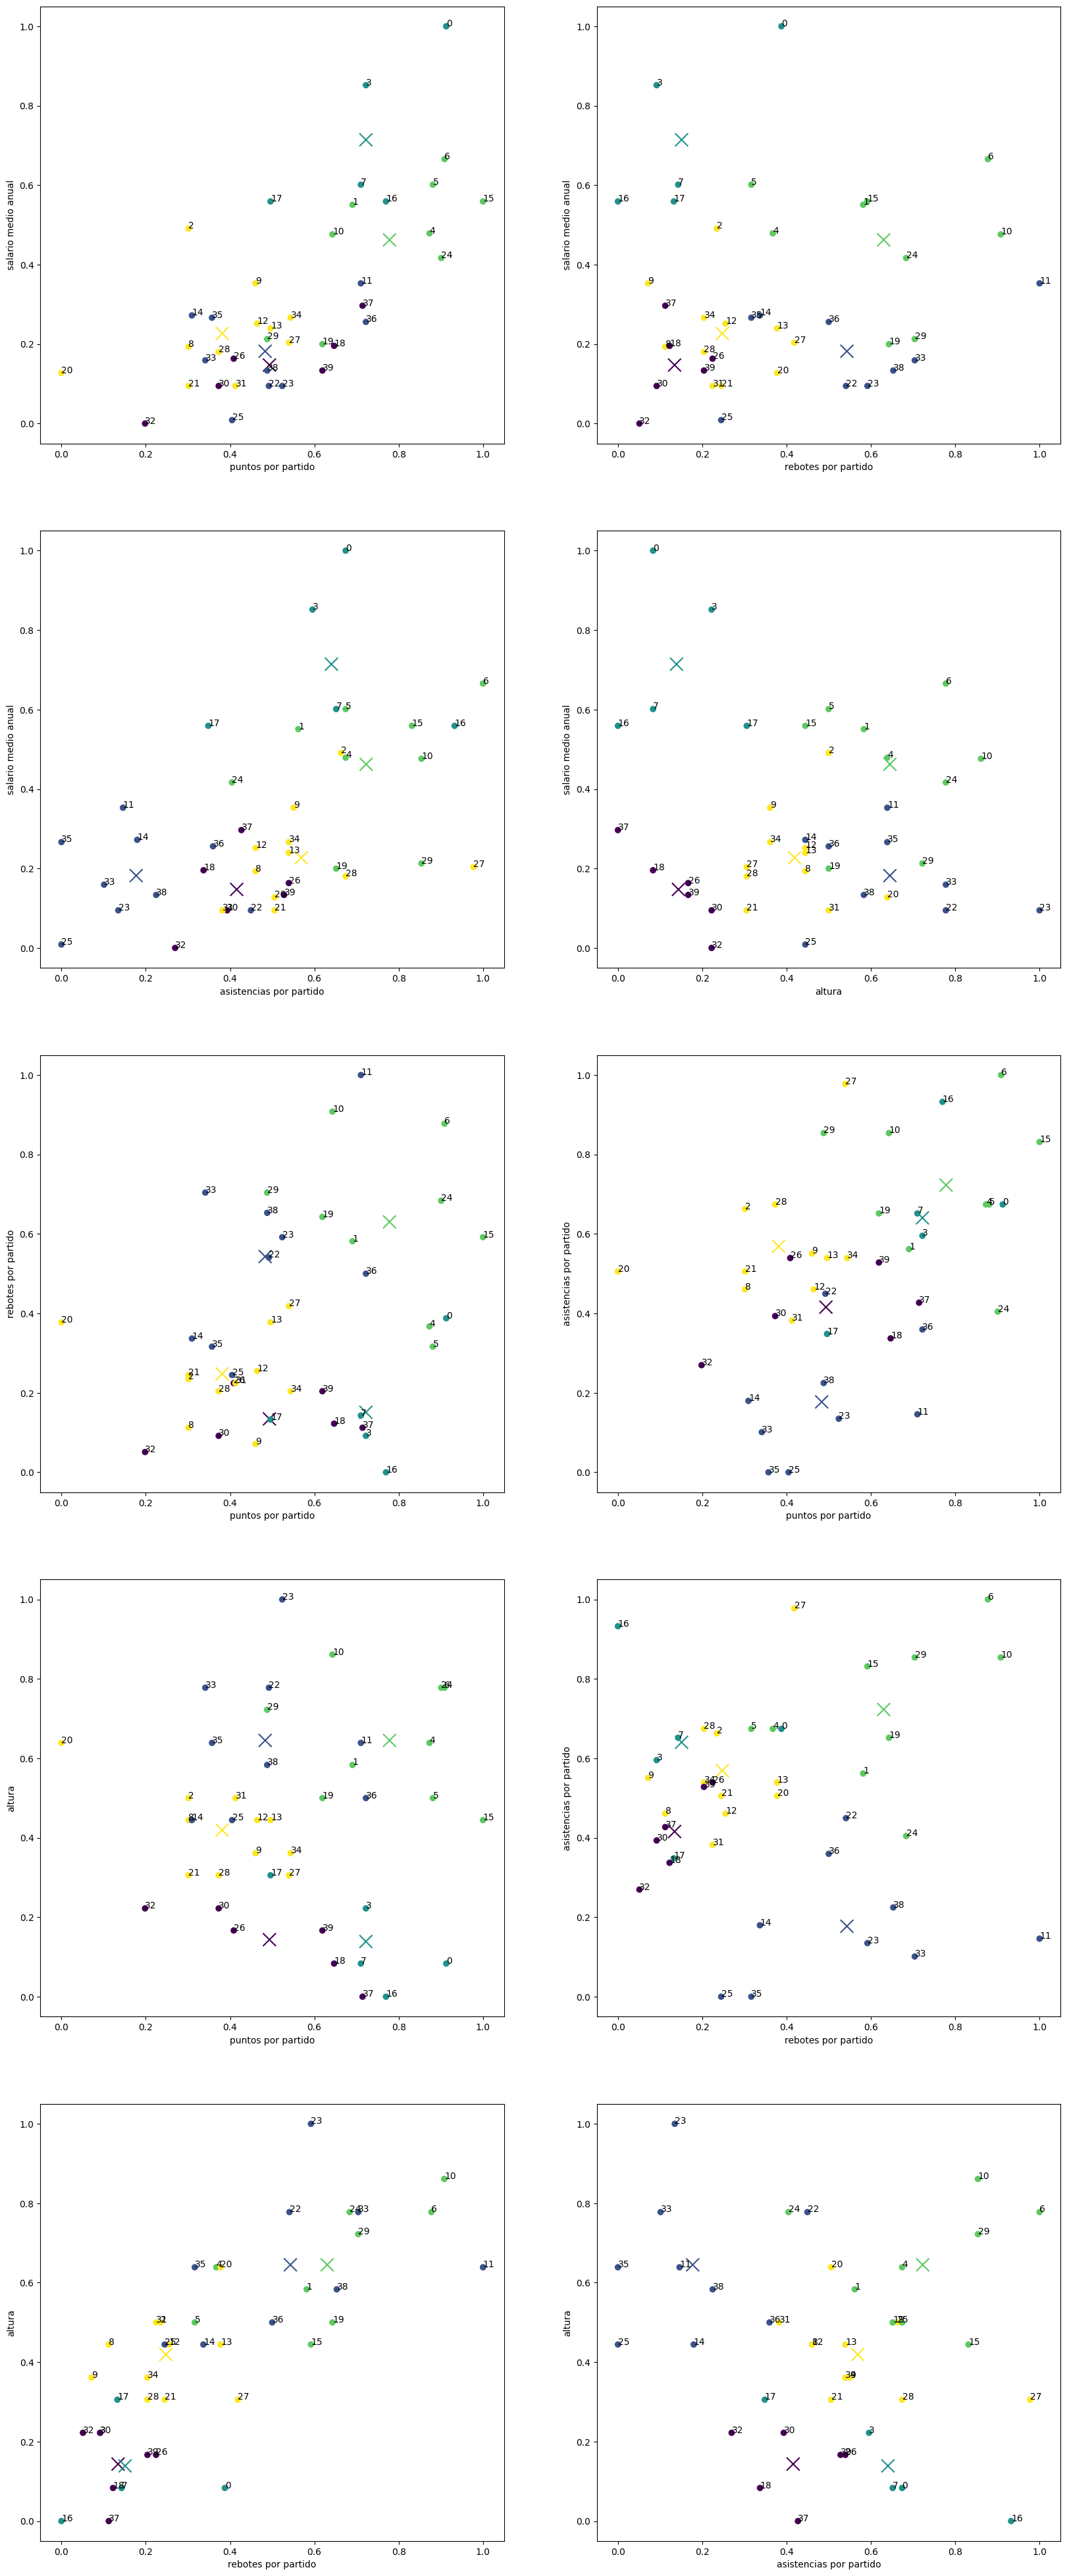

In [17]:
%matplotlib inline

# Creamos o entorno
fig = plt.figure(figsize=(20, 50))
ax1 = fig.add_subplot(521, projection='rectilinear') 
ax2 = fig.add_subplot(522, projection='rectilinear')
ax3 = fig.add_subplot(523, projection='rectilinear') 
ax4 = fig.add_subplot(524, projection='rectilinear')
ax5 = fig.add_subplot(525, projection='rectilinear') 
ax6 = fig.add_subplot(526, projection='rectilinear')
ax7 = fig.add_subplot(527, projection='rectilinear') 
ax8 = fig.add_subplot(528, projection='rectilinear')
ax9 = fig.add_subplot(529, projection='rectilinear')
ax10 = fig.add_subplot(5,2,10, projection='rectilinear')

# Engadimos os centroides
lista_centroides = np.array(range(centroides_mellor.shape[0]))
ax1.scatter(centroides_mellor[:, 0], centroides_mellor[:, 4], s=200, marker='x', c=lista_centroides)
ax2.scatter(centroides_mellor[:, 1], centroides_mellor[:, 4], s=200, marker='x', c=lista_centroides)
ax3.scatter(centroides_mellor[:, 2], centroides_mellor[:, 4], s=200, marker='x', c=lista_centroides)
ax4.scatter(centroides_mellor[:, 3], centroides_mellor[:, 4], s=200, marker='x', c=lista_centroides)
ax5.scatter(centroides_mellor[:, 0], centroides_mellor[:, 1], s=200, marker='x', c=lista_centroides)
ax6.scatter(centroides_mellor[:, 0], centroides_mellor[:, 2], s=200, marker='x', c=lista_centroides)
ax7.scatter(centroides_mellor[:, 0], centroides_mellor[:, 3], s=200, marker='x', c=lista_centroides)
ax8.scatter(centroides_mellor[:, 1], centroides_mellor[:, 2], s=200, marker='x', c=lista_centroides)
ax9.scatter(centroides_mellor[:, 1], centroides_mellor[:, 3], s=200, marker='x', c=lista_centroides)
ax10.scatter(centroides_mellor[:, 2], centroides_mellor[:, 3], s=200, marker='x', c=lista_centroides)

# Nomeamos os eixos
ax1.set_xlabel("puntos por partido")
ax1.set_ylabel("salario medio anual")

ax2.set_xlabel("rebotes por partido")
ax2.set_ylabel("salario medio anual")

ax3.set_xlabel("asistencias por partido")
ax3.set_ylabel("salario medio anual")

ax4.set_xlabel("altura")
ax4.set_ylabel("salario medio anual")

ax5.set_xlabel("puntos por partido")
ax5.set_ylabel("rebotes por partido")

ax6.set_xlabel("puntos por partido")
ax6.set_ylabel("asistencias por partido")

ax7.set_xlabel("puntos por partido")
ax7.set_ylabel("altura")

ax8.set_xlabel("rebotes por partido")
ax8.set_ylabel("asistencias por partido")

ax9.set_xlabel("rebotes por partido")
ax9.set_ylabel("altura")

ax10.set_xlabel("asistencias por partido")
ax10.set_ylabel("altura")

# Debuxamos o scatter
ax1.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 4], c=clusters_mellor)
ax2.scatter(xogadores_mat_stand[:, 1], xogadores_mat_stand[:, 4], c=clusters_mellor)
ax3.scatter(xogadores_mat_stand[:, 2], xogadores_mat_stand[:, 4], c=clusters_mellor)
ax4.scatter(xogadores_mat_stand[:, 3], xogadores_mat_stand[:, 4], c=clusters_mellor)
ax5.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 1], c=clusters_mellor)
ax6.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 2], c=clusters_mellor)
ax7.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 3], c=clusters_mellor)
ax8.scatter(xogadores_mat_stand[:, 1], xogadores_mat_stand[:, 2], c=clusters_mellor)
ax9.scatter(xogadores_mat_stand[:, 1], xogadores_mat_stand[:, 3], c=clusters_mellor)
ax10.scatter(xogadores_mat_stand[:, 2], xogadores_mat_stand[:, 3], c=clusters_mellor)

# Imprimimos os identificadores
for i in xogadores.index:
    ax1.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,4], i)
    ax2.text(xogadores_mat_stand[i,1], xogadores_mat_stand[i,4], i)
    ax3.text(xogadores_mat_stand[i,2], xogadores_mat_stand[i,4], i)
    ax4.text(xogadores_mat_stand[i,3], xogadores_mat_stand[i,4], i)
    ax5.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,1], i)
    ax6.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,2], i)
    ax7.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,3], i)
    ax8.text(xogadores_mat_stand[i,1], xogadores_mat_stand[i,2], i)
    ax9.text(xogadores_mat_stand[i,1], xogadores_mat_stand[i,3], i)
    ax10.text(xogadores_mat_stand[i,2], xogadores_mat_stand[i,3], i)

plt.show()

### Análise dos agrupamentos

Co obxectivo de atopar características comúns aos xogadores que pertencen a cada clúster, analizaremos os clústers un a un, vendo cales das 5 variables caracterizan mellor aos xogadores de cada grupo.

#### Clúster azul escuro

Comezaremos analizando o clúster azul escuro, asociado ao centroide (0.48324515, 0.5430839 , 0.1772784 , 0.64506173, 0.18196089). Os xogadores deste agrupamento parece que se caracterizan por dar poucas asistencias e coller bastantes rebotes e, polo tanto, como a altura e os rebotes están bastante correlacionados positivamente, tamén se caracterizan por ser altos. Ademais, son xogadores que cobran relativamente pouco (tendo en conta que están entre os 40 xogadores mellor pagados da NBA). Con respecto aos puntos por partido, non é un grupo que se diferencie do resto en función desta variable.
 
Non obstante, a pesar de que o salario medio axuda a diferenciar este agrupamento doutros, como por exemplo, do azul claro, semella que as asistencias, os rebotes e a altura son as variables que máis caracterizan este clúster. Vémolo nunha gráfica en 3 dimensións.

In [18]:
xogadores['mediarebotes'].corr(xogadores['altura'])

0.7629091565036383

<IPython.core.display.Javascript object>


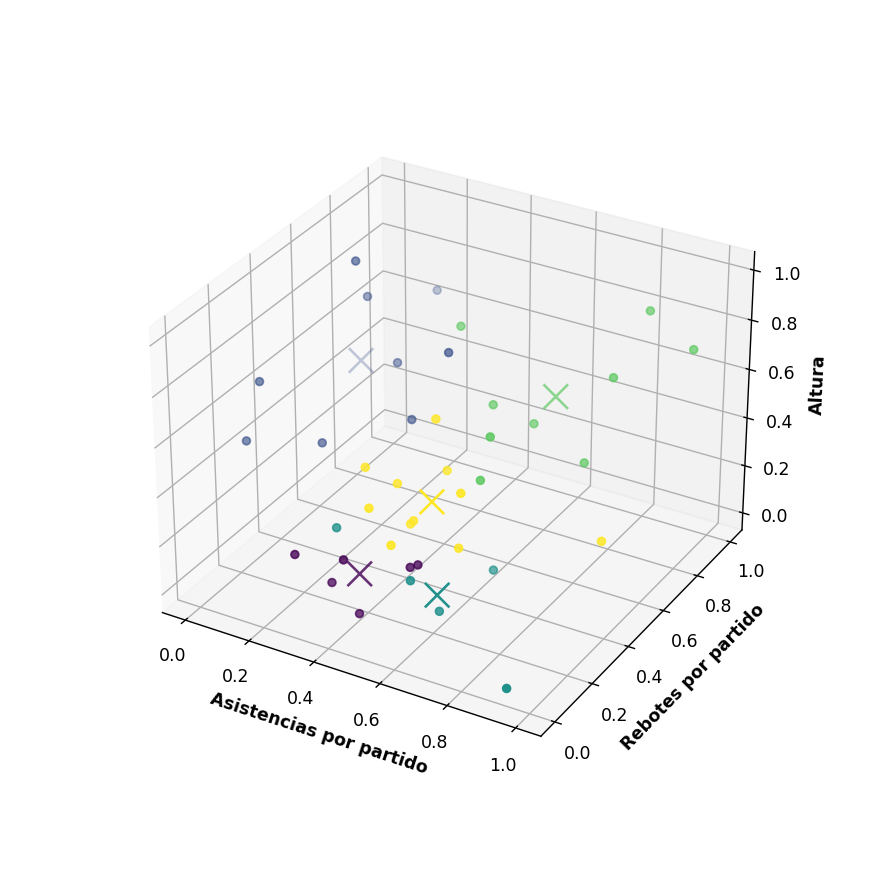

In [27]:
%matplotlib notebook

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection ="3d")   
 
lista_centroides = np.array(range(centroides_mellor.shape[0]))
    
ax.scatter(xogadores_mat_stand[:, 2], xogadores_mat_stand[:, 1], xogadores_mat_stand[:, 3], c=clusters_mellor)
ax.scatter(centroides_mellor[:, 2], centroides_mellor[:, 1], centroides_mellor[:, 3], s=200, marker='x', c=lista_centroides)

ax.set_xlabel('Asistencias por partido', fontweight ='bold') 
ax.set_ylabel('Rebotes por partido', fontweight ='bold') 
ax.set_zlabel('Altura', fontweight ='bold')

plt.show()

Nesta gráfica vese que a altura e os rebotes apenas diferencian os clúster azul escuro do verde, pero as asistencias si que diferencian estes dous clústers moi ben. De feito, podemos afirmar que os xogadores do clúster verde se caracterizan por dar moitas asistencias. Todo o contrario aos xogadores do clúster azul.

Por outro lado, as asistencias quizais non logran diferenciar os xogadores do clúster azul escuro e os do morado (algúns xogadores do azul escuro dan máis asistencias por partido que os do morado). Porén, tanto os rebotes como a altura diferencian claramente estes dous grupos. Pódese ver mellor nas seguintes gráficas.

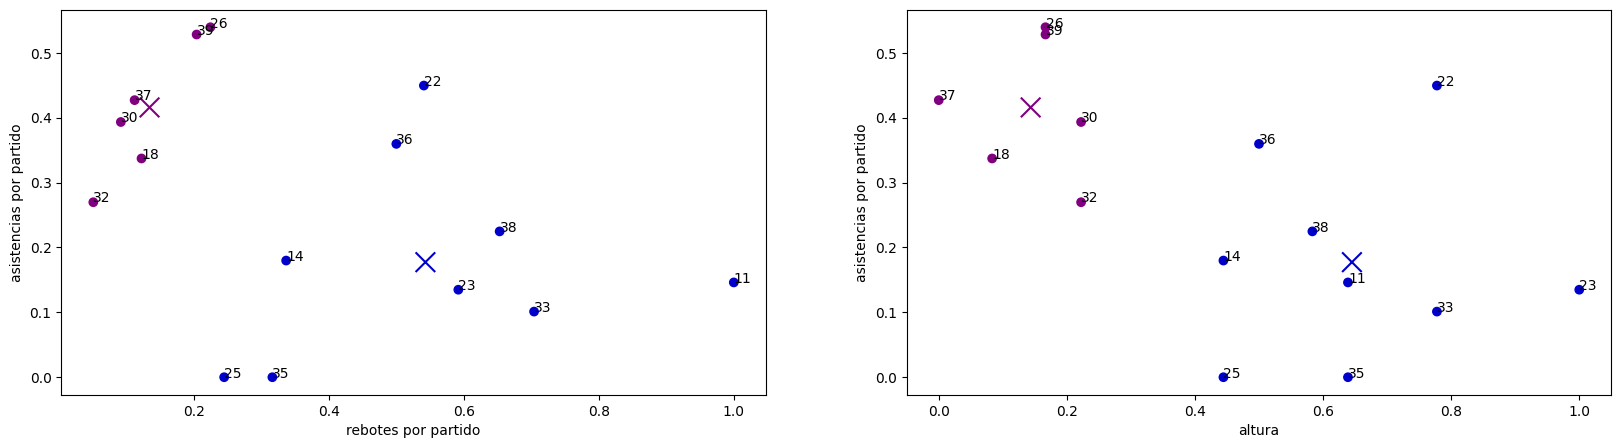

In [20]:
%matplotlib inline

# Creamos o entorno
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121, projection='rectilinear') 
ax2 = fig.add_subplot(122, projection='rectilinear')

# Engadimos os centroides
lista_cores_centroides = np.array(['purple','mediumblue'])
ax1.scatter(centroides_mellor[[0,1], 1], centroides_mellor[[0,1], 2], s=200, marker='x', c=lista_cores_centroides)
ax2.scatter(centroides_mellor[[0,1], 3], centroides_mellor[[0,1], 2], s=200, marker='x', c=lista_cores_centroides)

# Nomeamos os eixos
ax1.set_xlabel("rebotes por partido")
ax1.set_ylabel("asistencias por partido")

ax2.set_xlabel("altura")
ax2.set_ylabel("asistencias por partido")

# Debuxamos o scatter
xog_clusters_0_1 = np.where((clusters_mellor == 0) | (clusters_mellor == 1)) # Obtemos os índices dos xogadores dos clusters amarelo e morado
ax1.scatter(xogadores_mat_stand[xog_clusters_0_1, 1], xogadores_mat_stand[xog_clusters_0_1, 2], c=lista_cores_centroides[clusters_mellor[xog_clusters_0_1]])
ax2.scatter(xogadores_mat_stand[xog_clusters_0_1, 3], xogadores_mat_stand[xog_clusters_0_1, 2], c=lista_cores_centroides[clusters_mellor[xog_clusters_0_1]])

# Imprimimos os identificadores
for i in np.nditer(xog_clusters_0_1):
    ax1.text(xogadores_mat_stand[i,1], xogadores_mat_stand[i,2], i)
    ax2.text(xogadores_mat_stand[i,3], xogadores_mat_stand[i,2], i)

plt.show()

#### Clúster verde

Analizamos agora o clúster verde asociado ao centroide (0.77821869, 0.63038549, 0.72284644, 0.64506173, 0.46226185). Se observamos as gráficas en dúas dimensións, os xogadores deste clúster caracterízanse por ser xogadores altos e reboteadores. Ademais, podemos dicir que os xogadores deste clúster están entre os máximos anotadores e entre os máximos asistentes. Ademais, aínda que non está completamente claro, podemos afirmar que os xogadores deste clúster teñen salarios moi semellantes e correspóndense co segundo clúster que máis cobra, por detrás do azul claro. Con todo, podemos dicir que non hai unha característica que separe este clúster claramente dos demais, senón unha agrupación delas. 
 
Se observamos a seguinte figura, podemos apreciar que podemos dicir que os xogadores deste clúster son os xogadores máis altos e reboteadores que máis cobran. O salario serve para distinguir o clúster azul escuro do verde e os rebotes e a altura para distinguilo dos outros tres. Outra variable que nos serve para distinguir os clústers verde e azul escuro son as asistencias como xa comentabamos anteriormente.

<IPython.core.display.Javascript object>


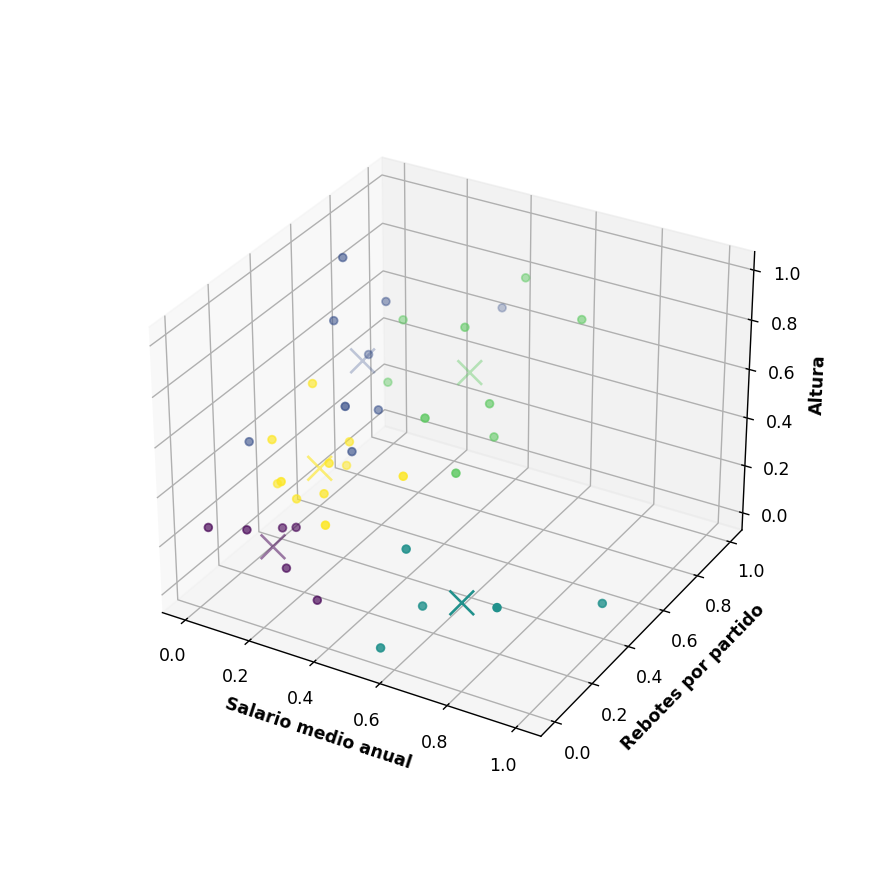

In [26]:
%matplotlib notebook

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection ="3d")   
 
lista_centroides = np.array(range(centroides_mellor.shape[0]))

ax.scatter(xogadores_mat_stand[:, 4], xogadores_mat_stand[:, 1], xogadores_mat_stand[:, 3], c=clusters_mellor)
ax.scatter(centroides_mellor[:, 4], centroides_mellor[:, 1], centroides_mellor[:, 3], s=200, marker='x', c=lista_centroides)

ax.set_xlabel('Salario medio anual', fontweight ='bold') 
ax.set_ylabel('Rebotes por partido', fontweight ='bold') 
ax.set_zlabel('Altura', fontweight ='bold')

plt.show()

#### Clúster morado

A continuación comentaremos as características do clúster morado, asociado ao centroide (0.49338624, 0.13435374, 0.41573034, 0.14351852, 0.14723543). Quizais este clúster pode ser o máis sinxelo de caracterizar. Se observamos a seguinte gráfica, vemos que este clúster queda totalmente diferenciado dos demais en función do salario e da altura: correspóndese co grupo de xogadores máis baixos e co salario máis baixo.

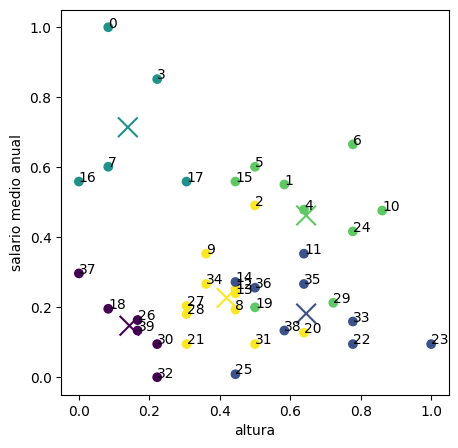

In [22]:
%matplotlib inline

# Creamos o entorno
fig = plt.figure(figsize=(5, 5))
ax4 = fig.add_subplot(111, projection='rectilinear')

# Engadimos os centroides
lista_centroides = np.array(range(centroides_mellor.shape[0]))
ax4.scatter(centroides_mellor[:, 3], centroides_mellor[:, 4], s=200, marker='x', c=lista_centroides)

# Nomeamos os eixos
ax4.set_xlabel("altura")
ax4.set_ylabel("salario medio anual")

# Debuxamos o scatter
ax4.scatter(xogadores_mat_stand[:, 3], xogadores_mat_stand[:, 4], c=clusters_mellor)

# Imprimimos os identificadores
for i in xogadores.index:
    ax4.text(xogadores_mat_stand[i,3], xogadores_mat_stand[i,4], i)

plt.show()

Tamén poderíamos dicir que os xogadores deste clústers son os menos reboteadores, mais con respecto a esta variable non se chega a diferenciar este clúster do amarelo.

#### Clúster amarelo

Con respecto ao clúster amarelo, asociado ao centroide (0.38131313, 0.24768089, 0.56894791, 0.41919192, 0.22679012), podemos dicir que, igual que no caso do clúster verde, é difícil diferencialos do resto de clústers. Quizais, a altura pode ser a que máis marca a diferencia: os xogadores deste clúster non son nin os máis altos nin os máis baixos, atópanse a medio camiño entre os xogadores dos clústers azul claro e morado e os clústers verde e azul (isto podémolo ver na gráfica anterior).
 
   Para precisar algo máis podemos tratar de diferenciar este clúster do azul claro, verde e morado mediante o salario medio anual e a altura. Podemos dicir, observando a anterior gráfica, que o clúster azul escuro e o clúster amarelo agrupa xogadores de estatura media e alta e con salarios baixos. Non obstante para diferenciar os xogadores do clúster amarelo dos do azul, podemos dicir que os xogadores do clúster amarelo dan moitas asistencias e collen poucos rebotes.

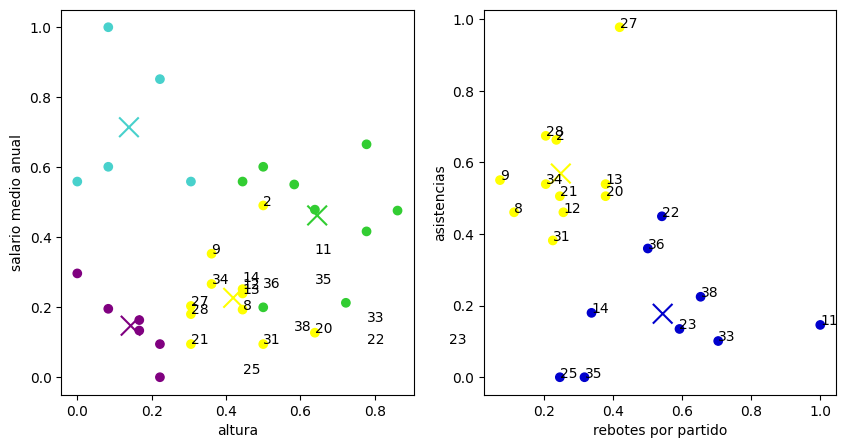

In [23]:
%matplotlib inline

# Creamos o entorno
fig = plt.figure(figsize=(10, 5))
ax4 = fig.add_subplot(121, projection='rectilinear')
ax5 = fig.add_subplot(122, projection='rectilinear')

# Engadimos os centroides
lista_cores_centroides = np.array(['purple','mediumturquoise','limegreen','yellow'])
ax4.scatter(centroides_mellor[[0,2,3,4], 3], centroides_mellor[[0,2,3,4], 4], s=200, marker='x', c=lista_cores_centroides)

lista_cores_centroides = np.array(['mediumblue','yellow'])
ax5.scatter(centroides_mellor[[1,4], 1], centroides_mellor[[1,4], 2], s=200, marker='x', c=lista_cores_centroides)

# Nomeamos os eixos
ax4.set_xlabel("altura")
ax4.set_ylabel("salario medio anual")

ax5.set_xlabel("rebotes por partido")
ax5.set_ylabel("asistencias")

# Debuxamos o scatter
xogs = np.where(clusters_mellor != 1)
lista_cores_centroides = np.array(['purple','mediumblue', 'mediumturquoise','limegreen','yellow'])
ax4.scatter(xogadores_mat_stand[xogs, 3], xogadores_mat_stand[xogs, 4], c=lista_cores_centroides[clusters_mellor[xogs]])

xogs = np.where((clusters_mellor == 1) | (clusters_mellor == 4))
lista_cores_centroides = np.array(['purple','mediumblue', 'mediumturquoise','limegreen','yellow'])
ax5.scatter(xogadores_mat_stand[xogs, 1], xogadores_mat_stand[xogs, 2], c=lista_cores_centroides[clusters_mellor[xogs]])

# Imprimimos os identificadores
for i in np.nditer(xogs):
    ax4.text(xogadores_mat_stand[i,3], xogadores_mat_stand[i,4], i)
    ax5.text(xogadores_mat_stand[i,1], xogadores_mat_stand[i,2], i)

plt.show()

Así, podemos caracterizar os xogadores deste clúster como xogadores cun salario baixo e de estatura intermedia que, ademais, dan moitas asistencais e collen poucos rebotes.

#### Clúster azul claro

Con respecto aos xogadores do clúster azul claro, asociado ao centroide (0.72222222, 0.15102041, 0.64044944, 0.13888889, 0.71420812), son xogadores que cobran moito e son baixos. Na seguinte gráfica apréciase claramente como estas dúas variables separan este clúster do resto. Ademais, xunto cos xogadores do clúster verde, entre os xogadores máis anotadores do dataset, son os máis caros.

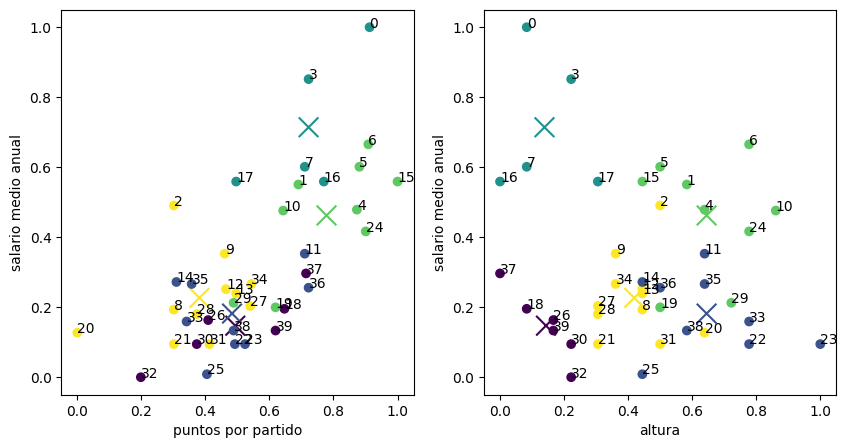

In [24]:
%matplotlib inline

# Creamos o entorno
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='rectilinear')
ax4 = fig.add_subplot(122, projection='rectilinear')

# Engadimos os centroides
lista_centroides = np.array(range(centroides_mellor.shape[0]))
ax1.scatter(centroides_mellor[:, 0], centroides_mellor[:, 4], s=200, marker='x', c=lista_centroides)
ax4.scatter(centroides_mellor[:, 3], centroides_mellor[:, 4], s=200, marker='x', c=lista_centroides)

# Nomeamos os eixos
ax1.set_xlabel("puntos por partido")
ax1.set_ylabel("salario medio anual")

ax4.set_xlabel("altura")
ax4.set_ylabel("salario medio anual")

# Debuxamos o scatter
ax1.scatter(xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 4], c=clusters_mellor)
ax4.scatter(xogadores_mat_stand[:, 3], xogadores_mat_stand[:, 4], c=clusters_mellor)

# Imprimimos os identificadores
for i in xogadores.index:
    ax1.text(xogadores_mat_stand[i,0], xogadores_mat_stand[i,4], i)
    ax4.text(xogadores_mat_stand[i,3], xogadores_mat_stand[i,4], i)

plt.show()

Na seguinte gráfica en 3 dimensións (altura, puntos por partido e salario medio anual) obsérvase claramente como este clúster se diferencia do resto.

<IPython.core.display.Javascript object>


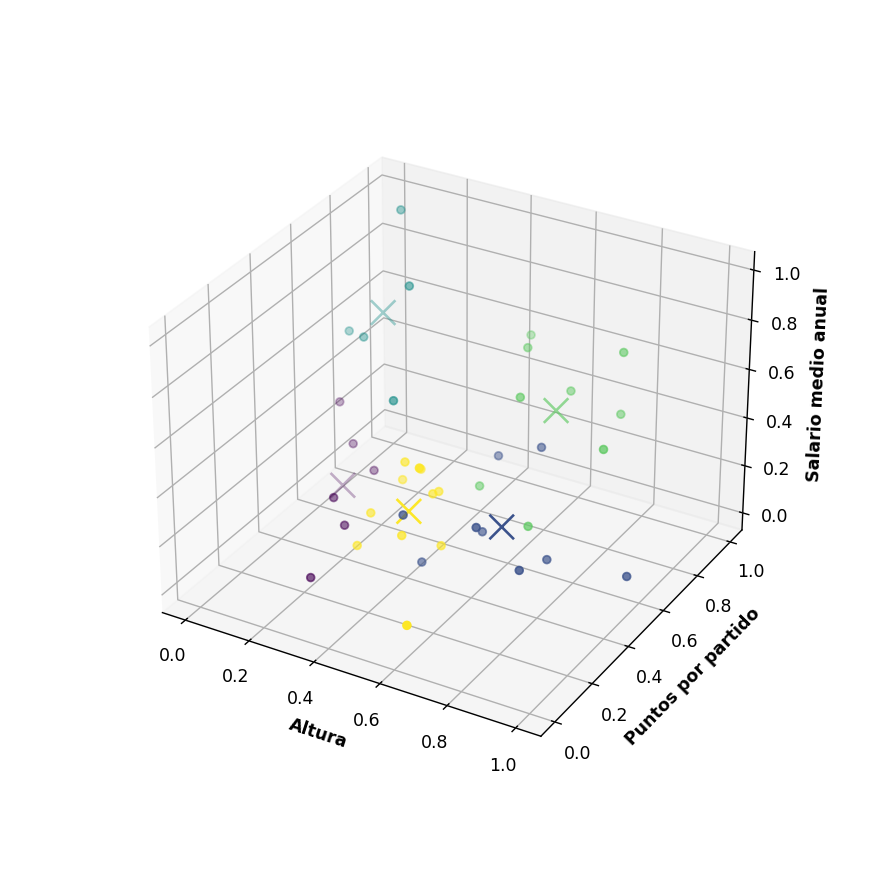

In [25]:
%matplotlib notebook

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection ="3d")   
 
lista_centroides = np.array(range(centroides_mellor.shape[0]))

ax.scatter(xogadores_mat_stand[:, 3], xogadores_mat_stand[:, 0], xogadores_mat_stand[:, 4], c=clusters_mellor)
ax.scatter(centroides_mellor[:, 3], centroides_mellor[:, 0], centroides_mellor[:, 4], s=200, marker='x', c=lista_centroides)

ax.set_xlabel('Altura', fontweight ='bold') 
ax.set_ylabel('Puntos por partido', fontweight ='bold') 
ax.set_zlabel('Salario medio anual', fontweight ='bold')

plt.show()

### Conclusión

Para finalizar, resumiremos as características que fomos resltando de cada clúster e trataremos de identificar que tipo de xogador encaixa con cada agrupamento.

- Os xogadores do clúster azul son dos máis altos e rebotean ben. Ademais, cobran relativamente pouco e dan poucas asistencias. Polo tanto, podemos pensar que estes xogadores poderían ser xogadores interiores (pívots) cunha función máis defensiva (coller moitos rebotes e non anotan moitos puntos) e que non son pezas imprescindibles nos seus equipos (cobran salarios baixos). Con todo, están entre os 40 xogadores mellor pagados da NBA, polo que seguro que xogan moitos minutos igualmente. Ademais, o feito de dar poucas asistencias pode que se relacione con que nas xogadas ofensivas do equipo non teñan moita responsabilidade (simplemente poñen bloqueos, están pendentes do rebote ofensivo e os balóns que reciben son na zona e para finalizar a xogada).
- Por outro lado, os xogadores do clúster verde tamén son dos máis altos e tamén rebotean ben. Con todo, a diferencia do anterior, dan moitas máis asistencias e meten máis puntos. Non obstante, a diferenza do anterior clúster, posiblemente se trate de xogadores con máis responsabilidade ofensiva, xa que meten máis puntos e dan máis asistencias. Debido a isto, pode tratarse de xogadores exteriores (na NBA suelen ser máis anotadores) moi altos ou de xogadores interiores máis ofensivos. Ademais, seguramente sexan máis importantes nos seus equipos, xa que dentro do dataset, poderíamos dicir que son máis ou menos, o segundo grupo mellor pagado.
- Con respecto aos xogadores do clúster morado, posiblemente se trate de xogadores exteriores (son dos máis baixos do dataset) e que non son fundamentais nos seus equipos (cobran pouco e anotan poucos puntos). Ademais, os rebotes por partido tamén axudan a pensar que sexan xogadores exteriores, xa que este, normalmente, teñen menos responsabilidade á hora de rebotear.
- Os xogadores do clúster amarelo tamén se poden corresponder con xogadores exteriores, xa que son máis baixos que os do clúster verde e azul. Con todo, serían xogadores exteriores bastante altos. Isto último podería ser o único que os diferencia dos xogadores do clúster morado, xa que, igual que eles, teñen salarios baixos e non destacan en anotación nin en asistencias.
- Por último, os xogadores do clúster azul claro, xunto cos do clúster verde, son os máis anotadores e os que máis cobran. Non obstante, os deste clúster, en xeral, teñen salarios máis altos, polo que posiblemente se trate dos xogadores máis destacados da NBA. Ademais, algo que os diferencia xunto co salario, é a altura: son baixos. Polo tanto, posiblemente se trate de xogadores exteriores. De feito, quizais esta sexa a gran diferenza cos xogadores do clúster verde.

**************************************************************